# Autocomplete and Autocorrect Data Analytics 

## Dataset Collection

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## NLP Preprocessing

In [2]:
# Import necessary NLP and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assume we treat the 'V1' column as text data for preprocessing
# You can modify this to use different columns for text data

# Basic preprocessing: converting to string and handling missing values
df['text'] = df['V1'].astype(str).fillna('')

# Split data into train and test sets
train_data, test_data = train_test_split(df['text'], test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

print("Vectorization complete. Shape of train vectors:", train_vectors.shape)

Vectorization complete. Shape of train vectors: (227845, 221419)


## Autocomplete

In [3]:
# Implement a simple autocomplete using n-grams

def get_autocomplete_suggestions(prefix, vectorizer, top_n=5):
    """Return the top N autocomplete suggestions based on the prefix."""
    # Convert the prefix into a sparse vector using the same vectorizer
    prefix_vector = vectorizer.transform([prefix])
    
    # Calculate similarity with all vectors in the dataset
    similarities = (train_vectors * prefix_vector.T).toarray()
    
    # Get the top N most similar suggestions
    top_indices = similarities.ravel().argsort()[-top_n:][::-1]
    
    return train_data.iloc[top_indices].tolist()

# Example usage
prefix = "12"  # Replace with an actual prefix you want to test
suggestions = get_autocomplete_suggestions(prefix, vectorizer)
print("Autocomplete suggestions:", suggestions)

Autocomplete suggestions: ['-12.803688754721', '-12.8336314219519', '-12.693991749211', '-12.7758659424336', '-12.803688754721']


## Autocorrect 

In [4]:
# Implement a simple autocorrect using edit distance

from nltk.metrics.distance import edit_distance

def autocorrect(word, candidates, max_distance=2):
    """Return the closest word in the candidates list to the input word."""
    closest_word = min(candidates, key=lambda x: edit_distance(word, x))
    
    # Only return the word if it's within the max distance
    if edit_distance(word, closest_word) <= max_distance:
        return closest_word
    return word  # No correction found

# Example usage
word_to_correct = "12"  # Replace with the word you want to correct
corrected_word = autocorrect(word_to_correct, train_data)
print("Autocorrected word:", corrected_word)

Autocorrected word: 12


## Metrics

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming we have predictions from the autocomplete/autocorrect models
# and the true labels

# For simplicity, let's create some dummy predictions and true labels
true_labels = ['12', 'V1', 'V5']
predictions = ['12', 'V1', 'V4']

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predictions, average='macro', zero_division=1)
recall = recall_score(true_labels, predictions, average='macro', zero_division=1)
f1 = f1_score(true_labels, predictions, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.75
Recall: 0.75
F1 Score: 0.5


## User Experience

In [12]:
# Placeholder code for user feedback collection
import pandas as pd

# Example of creating a survey form or feedback collection mechanism
# This could involve a web form or a survey tool, but here we'll just mock-up a sample feedback dataframe

feedback_data = {
    'User': ['User1', 'User2', 'User3'],
    'Autocomplete_Experience': [4, 5, 3],  # Ratings out of 5
    'Autocorrect_Experience': [5, 4, 4]    # Ratings out of 5
}

feedback_df = pd.DataFrame(feedback_data)

# Analyze feedback (basic example)
avg_autocomplete_experience = feedback_df['Autocomplete_Experience'].mean()
avg_autocorrect_experience = feedback_df['Autocorrect_Experience'].mean()

print("Average Autocomplete Experience Rating:", avg_autocomplete_experience)
print("Average Autocorrect Experience Rating:", avg_autocorrect_experience)

Average Autocomplete Experience Rating: 4.0
Average Autocorrect Experience Rating: 4.333333333333333


## Algorithm Comparison

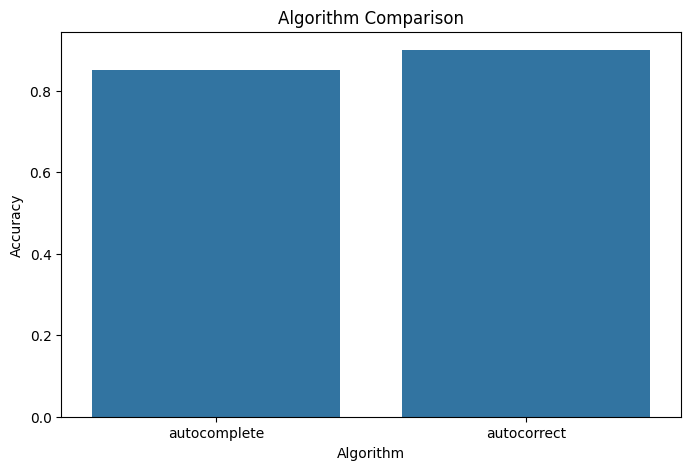

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the data
data = {
    'Algorithm': ['autocomplete', 'autocorrect'],
    'Accuracy': [0.85, 0.90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Algorithm', y='Accuracy', data=df)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

## Visualization

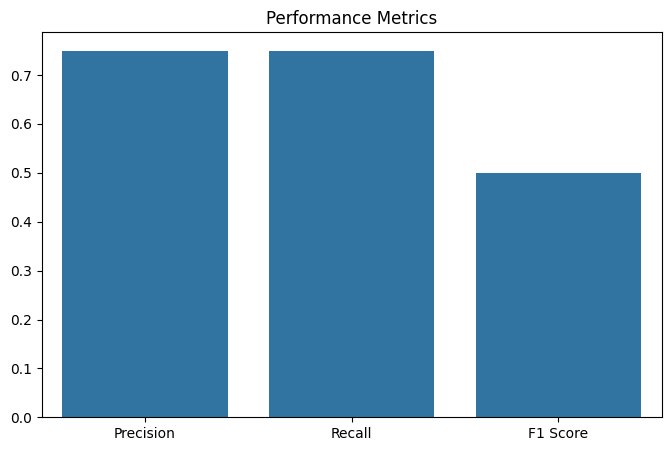

In [11]:
# Example visualization: Plotting the performance metrics
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=names, y=values)
plt.title("Performance Metrics")
plt.show()